Conclusions:  
- The two existing curves, RUOX (slot 1) and ROX100 (slot 2), do not match the official LakeShore curve.
- Curves ''U03636_RX102A'' and ''RX-102A.tbl'' differ only at the microohm level; the former has an additional point at 300 K.
- Load and switch to ''U03636_RX102A'' so that all systems are using the same curve.

In [1]:
%matplotlib inline

In [3]:
from equipment.srs import sim

In [7]:
c1 = sim.load_curve('/data/detectors/SRS/thermometry/RUOX.txt')
c2 = sim.load_curve('/data/detectors/SRS/thermometry/ROX100.txt')
lakeshore = sim.load_curve('/data/detectors/SRS/thermometry/U03636_RX102A.txt')

In [9]:
T, R, dRdT, Sd = np.loadtxt('/data/detectors/RX-102A.tbl', unpack=True)

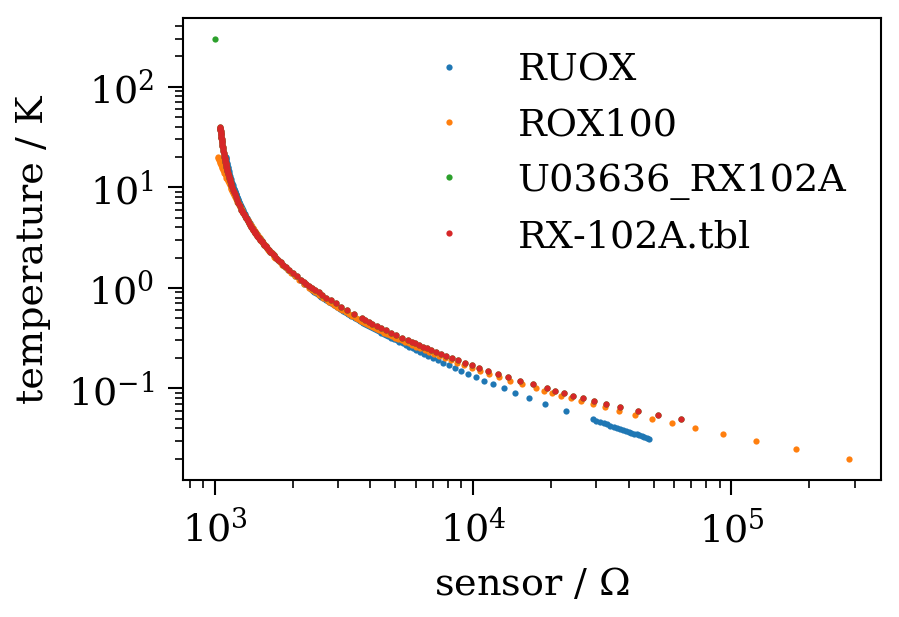

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('sensor / $\Omega$')
ax.set_ylabel('temperature / K')
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(c1.sensor, c1.temperature, '.', label=c1.identification)
ax.plot(c2.sensor, c2.temperature, '.', label=c2.identification)
ax.plot(lakeshore.sensor, lakeshore.temperature, '.', label=lakeshore.identification)
ax.plot(R, T, '.', label='RX-102A.tbl')
ax.legend()

In [17]:
np.all(lakeshore.temperature[1:] == T[::-1])

True

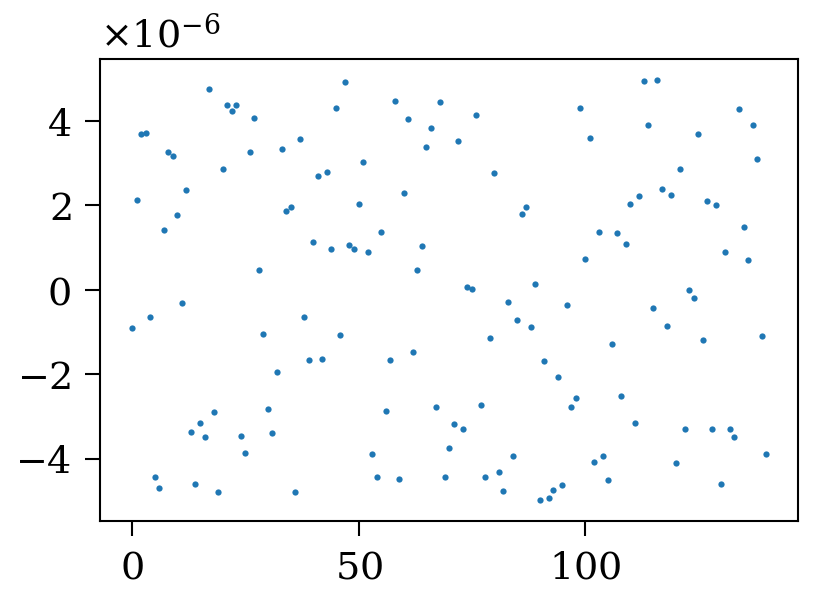

In [18]:
fig, ax = plt.subplots()
ax.plot(lakeshore.sensor[1:] - R[::-1], '.')